# Cramer's Rule, Inverse Matrix, and Volume

## 1) Definition

**Cramer's Rule:** For a square system $A \mathbf{x} = \mathbf{b}$ with $A \in \mathbb{R}^{n \times n}$ invertible, each component $x_i$ of the solution is:

$$
x_i = \frac{\det(A_i)}{\det(A)}
$$

where $A_i$ is the matrix $A$ with its $i$-th column replaced by $\mathbf{b}$.

**Inverse Matrix using Cofactors:** The inverse of an invertible matrix $A$ is:

$$
A^{-1} = \frac{1}{\det(A)} \text{adj}(A)
$$

where $\text{adj}(A)$ is the adjugate (transpose of cofactor matrix).

**Volume Interpretation:** The absolute value of the determinant of a matrix with columns as vectors represents the **volume** of the parallelepiped spanned by those vectors:

$$
\text{Volume} = |\det(A)|
$$


## 2) Derivation

1. **Cramer's Rule:**
   - Replace the $i$-th column of $A$ with $\mathbf{b}$ to form $A_i$.
   - Solve for $x_i$:
   $$
   x_i = \frac{\det(A_i)}{\det(A)}
   $$

2. **Inverse Matrix via Cofactors:**
   - Adjugate matrix $\text{adj}(A)$ is formed by taking the transpose of the cofactor matrix.
   - Then:
   $$
   A^{-1} = \frac{1}{\det(A)} \text{adj}(A)
   $$

3. **Volume Interpretation:**
   - For $n$ vectors $\mathbf{v}_1, \dots, \mathbf{v}_n \in \mathbb{R}^n$, the $n$-dimensional volume of the parallelepiped they span is:
   $$
   V = |\det([\mathbf{v}_1, \dots, \mathbf{v}_n])|
   $$


## 3) Computation Steps

**Step 1:** Compute $\det(A)$. If $\det(A)=0$, the system has no unique solution.

**Step 2 (Cramer's Rule):** For each $i$:
1. Form $A_i$ by replacing the $i$-th column of $A$ with $\mathbf{b}$.
2. Compute $\det(A_i)$.
3. Compute $x_i = \det(A_i)/\det(A)$.

**Step 3 (Inverse Matrix):**
1. Compute cofactors $C_{ij} = (-1)^{i+j} \det(M_{ij})$.
2. Form adjugate $\text{adj}(A) = C^T$.
3. Compute $A^{-1} = \text{adj}(A)/\det(A)$.

**Step 4 (Volume):**
- Compute $|\det(A)|$ to find the volume of the parallelepiped spanned by columns of $A$.


In [1]:
import jax.numpy as jnp

# Example 3x3 system
A = jnp.array([[2., -1., 1.],
               [3., 2., -2.],
               [1., 3., 1.]])
b = jnp.array([3., 1., 4.])

# Determinant of A
det_A = jnp.linalg.det(A)

# Function to compute x_i using Cramer's Rule
def cramer_solution(A, b):
    n = A.shape[0]
    x = jnp.zeros(n)
    for i in range(n):
        Ai = A.at[:, i].set(b)
        x = x.at[i].set(jnp.linalg.det(Ai) / jnp.linalg.det(A))
    return x

x_cramer = cramer_solution(A, b)

# Compute inverse using adjugate formula
def adjugate(A):
    n = A.shape[0]
    cofactor_matrix = jnp.zeros_like(A)
    for i in range(n):
        for j in range(n):
            minor = jnp.delete(jnp.delete(A, i, axis=0), j, axis=1)
            cofactor_matrix = cofactor_matrix.at[i,j].set(((-1)**(i+j)) * jnp.linalg.det(minor))
    return cofactor_matrix.T  # adjugate is transpose of cofactor matrix

A_inv = adjugate(A) / det_A

print("Determinant of A:", det_A)
print("Solution via Cramer's Rule x:", x_cramer)
print("Inverse of A using adjugate:\n", A_inv)
print("Check A @ A_inv:\n", A @ A_inv)


Determinant of A: 28.0
Solution via Cramer's Rule x: [1.  0.5 1.5]
Inverse of A using adjugate:
 [[ 0.2857143   0.14285715  0.        ]
 [-0.17857143  0.03571429  0.25      ]
 [ 0.25       -0.25        0.25      ]]
Check A @ A_inv:
 [[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [5.9604645e-08 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]


## 4) Plotting

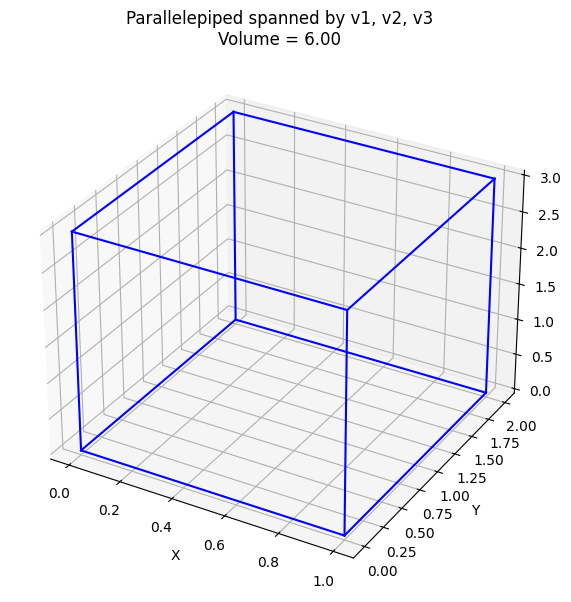

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D vectors as columns of a 3x3 matrix
v1 = jnp.array([1., 0., 0.])
v2 = jnp.array([0., 2., 0.])
v3 = jnp.array([0., 0., 3.])

# Volume = |det([v1 v2 v3])|
V = jnp.abs(jnp.linalg.det(jnp.column_stack([v1, v2, v3])))

# Plot parallelepiped
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Parallelepiped vertices
origin = jnp.array([0,0,0])
points = jnp.array([origin, v1, v2, v3, v1+v2, v1+v3, v2+v3, v1+v2+v3])

# Plot edges
edges = [
    (0,1),(0,2),(0,3),
    (1,4),(1,5),(2,4),(2,6),(3,5),(3,6),
    (4,7),(5,7),(6,7)
]
for e in edges:
    ax.plot(*zip(points[e[0]], points[e[1]]), color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Parallelepiped spanned by v1, v2, v3\nVolume = {V:.2f}")
plt.show()


## 5) Use Cases

1. **Solving Linear Systems:** Cramer's Rule gives explicit solutions for small systems.
2. **Inverse Matrices:** Compute $A^{-1}$ for solving $A \mathbf{x} = \mathbf{b}$ or linear transformations.
3. **Volume Calculation:** Determinants measure volumes of parallelepipeds in geometry.
4. **Physics & Engineering:** Use determinants for torque, area, and 3D volume calculations.
5. **Linear Algebra Theory:** Verify invertibility, compute adjugate matrices, and understand transformations.
